In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Data from Kaggle

In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0%|          | 0.00/31.2k [00:00<?, ?B/s]
100%|##########| 31.2k/31.2k [00:00<00:00, 2.28MB/s]

  0%|          | 0.00/441k [00:00<?, ?B/s]
100%|##########| 441k/441k [00:00<00:00, 8.34MB/s]

  0%|          | 0.00/450k [00:00<?, ?B/s]
100%|##########| 450k/450k [00:00<00:00, 9.59MB/s]

  0%|          | 0.00/13.1k [00:00<?, ?B/s]
100%|##########| 13.1k/13.1k [00:00<00:00, 891kB/s]


#### Explore files that were Imported

In [57]:
df_train = pd.read_csv(r'../Data/train.csv')
df_test = pd.read_csv(r'../Data/test.csv')

**1. Implies total 81 columns but 38 are numeric shown in describe()**
         **2. 1460 rows or unique id of houses sold in training dataset**

In [58]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [60]:
(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageCond       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
                   ...   
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
3SsnPorch        0.000000
BsmtUnfSF        0.000000
ScreenPorch      0.000000
PoolArea    

### The above analysis shows that only Numerical values have Nan's which need to be dealt with and not Categorical variables as they have Information in the Nan

In [62]:
df_numeric = df_train.select_dtypes(exclude= ['object'])

In [63]:
df_obj = df_train.select_dtypes(exclude= ['int64', 'float64', 'float', 'int'])

In [64]:
print(df_obj.shape)
print(df_numeric.shape)
print(df_train.shape)

(1460, 43)
(1460, 38)
(1460, 81)


In [65]:
df_obj.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


C:\Users\ox008\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


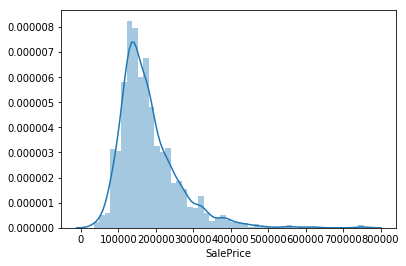

In [66]:
## Histogram of Salerpice --> Not Normal distribution should be transforming for better regression
sns.distplot(df_train['SalePrice']);

In [20]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


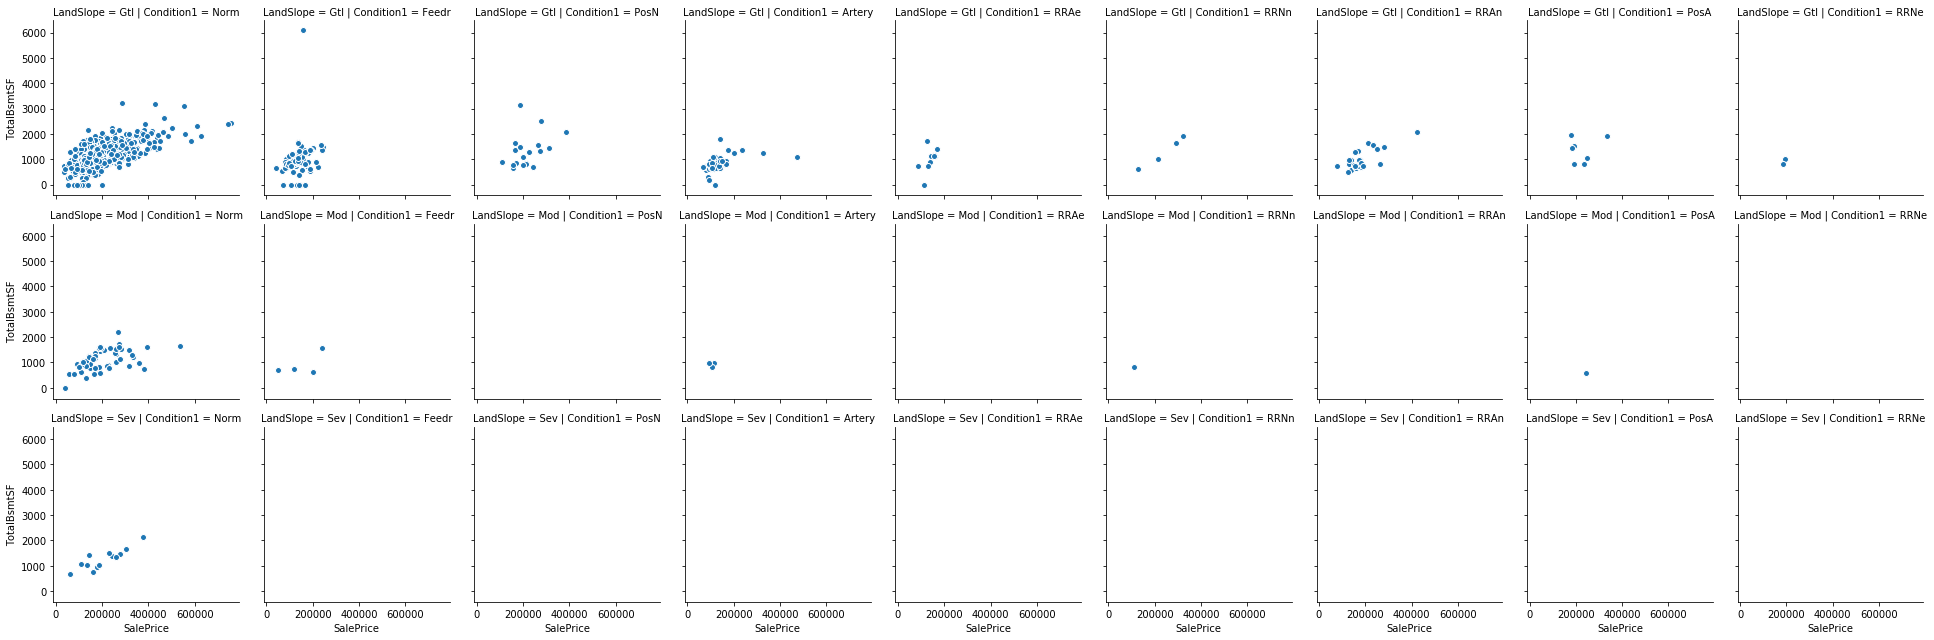

In [21]:
g = sns.FacetGrid(df_train, col="Condition1",  row="LandSlope")
g = g.map(plt.scatter, "SalePrice", "TotalBsmtSF", edgecolor="w")

- Convert the Categorical to type category and not obkect makes it faster

In [22]:
df_obj['FireplaceQu'].unique()  ## Nan is another category according to description

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [67]:
cat_columns = df_obj.columns
df_train[cat_columns] = df_train[cat_columns].astype('category')
df_test[cat_columns] = df_test[cat_columns].astype('category')
df_train[cat_columns] = df_train[cat_columns].apply(lambda x: x.cat.codes)
df_test[cat_columns] = df_test[cat_columns].apply(lambda x: x.cat.codes)

### Some still contains Nan, Let's check cat codes did what to the Nans

In [69]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,-1,3,3,0,...,0,-1,-1,-1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,-1,3,3,0,...,0,-1,-1,-1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,-1,0,3,0,...,0,-1,-1,-1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,-1,0,3,0,...,0,-1,-1,-1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,-1,0,3,0,...,0,-1,-1,-1,0,12,2008,8,4,250000


In [68]:
 # All categorical one's took it as another category
(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False).head()

LotFrontage    0.177397
GarageYrBlt    0.055479
MasVnrArea     0.005479
SalePrice      0.000000
ExterCond      0.000000
dtype: float64

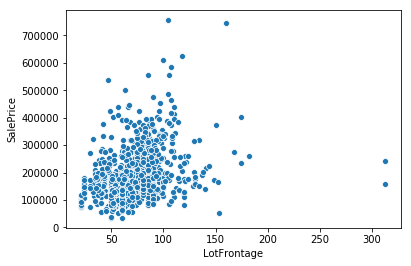

In [70]:
sns.scatterplot(data= df_train, x = 'LotFrontage', y = 'SalePrice')

In [71]:
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(0)

df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(1900)

In [72]:
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(0)

df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(1900)

In [73]:
df_test.isnull().sum().sort_values(ascending = False).head(10)

BsmtFullBath    2
BsmtHalfBath    2
BsmtFinSF2      1
GarageCars      1
GarageArea      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFinSF1      1
BsmtExposure    0
MasVnrType      0
dtype: int64

In [74]:
df_test.fillna(0, inplace= True)

#### Looking at the Correlation between different variables and finding the most important one's

- Find the one's that are somewhat correlated to the output variable (Threshold > 0.4)

In [75]:
cor = df_train.corr().abs()

In [76]:
cor_target = abs(cor["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
ExterQual       0.636884
BsmtQual        0.438881
TotalBsmtSF     0.613581
HeatingQC       0.400178
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
KitchenQual     0.589189
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.518287
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

- Find the variables which are correlated to each other highyl

In [77]:
relevant_columns = relevant_features.reset_index()['index'].tolist()

In [78]:
df_train[relevant_columns].corr()
# some variable seem to be correlated by more than +-0.6 to each other

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.407252,-0.634319,-0.387637,0.537808,-0.425944,0.476224,0.593007,0.550600,-0.555348,0.427452,0.396765,0.571646,0.600671,0.562022,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.311600,-0.494220,-0.415403,0.391452,-0.398668,0.281986,0.199010,0.468271,-0.359135,0.095589,0.147716,0.763228,0.537850,0.478954,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.176529,-0.482496,-0.320014,0.291066,-0.495664,0.240379,0.287389,0.439046,-0.452431,0.191740,0.112581,0.562938,0.420622,0.371600,0.507101
MasVnrArea,0.407252,0.311600,0.176529,1.000000,-0.353094,-0.237143,0.360067,-0.142310,0.339850,0.388052,0.272999,-0.257220,0.279568,0.247015,0.268875,0.361945,0.370884,0.472614
ExterQual,-0.634319,-0.494220,-0.482496,-0.353094,1.000000,0.461096,-0.445952,0.432499,-0.383767,-0.407642,-0.412808,0.641584,-0.289246,-0.222221,-0.466821,-0.449980,-0.443532,-0.636884
BsmtQual,-0.387637,-0.415403,-0.320014,-0.237143,0.461096,1.000000,-0.124887,0.279603,-0.294157,-0.266890,-0.373186,0.399689,-0.196459,-0.122459,-0.352918,-0.371323,-0.334440,-0.438881
TotalBsmtSF,0.537808,0.391452,0.291066,0.360067,-0.445952,-0.124887,1.000000,-0.231102,0.819530,0.454868,0.323722,-0.382415,0.285573,0.339519,0.345448,0.434585,0.486665,0.613581
HeatingQC,-0.425944,-0.398668,-0.495664,-0.142310,0.432499,0.279603,-0.231102,1.000000,-0.165565,-0.237985,-0.316938,0.388233,-0.159022,-0.122745,-0.381340,-0.302616,-0.258249,-0.400178
1stFlrSF,0.476224,0.281986,0.240379,0.339850,-0.383767,-0.294157,0.819530,-0.165565,1.000000,0.566024,0.380637,-0.356742,0.409516,0.410531,0.274616,0.439317,0.489782,0.605852
GrLivArea,0.593007,0.199010,0.287389,0.388052,-0.407642,-0.266890,0.454868,-0.237985,0.566024,1.000000,0.630012,-0.381638,0.825489,0.461679,0.268196,0.467247,0.468997,0.708624


In [79]:
## remove columns which are more than 0.7 correlated to each other
Y = df_train['SalePrice']
df_train = df_train[relevant_columns]

In [80]:
# Create correlation matrix
corr_matrix = df_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

In [81]:
df_train_fin_features = df_train.drop(df_train[to_drop], axis=1)

In [82]:
df_train_fin_features.shape  ## Not much correlation between matrix, can change the numbers in script and run again.

(1460, 13)

In [83]:
df_train_fin_features.isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
ExterQual       0
BsmtQual        0
TotalBsmtSF     0
HeatingQC       0
GrLivArea       0
FullBath        0
KitchenQual     0
Fireplaces      0
GarageCars      0
dtype: int64

In [84]:
X = df_train_fin_features

In [85]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X, Y)
print("Features sorted by their score:")
print( sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), relevant_columns), 
             reverse=True))

Features sorted by their score:
[(0.6235, 'OverallQual'), (0.1467, '1stFlrSF'), (0.0852, 'TotalBsmtSF'), (0.0268, 'YearBuilt'), (0.0242, 'YearRemodAdd'), (0.024, 'TotRmsAbvGrd'), (0.018, 'MasVnrArea'), (0.0156, 'GrLivArea'), (0.0103, 'KitchenQual'), (0.009, 'BsmtQual'), (0.0064, 'FullBath'), (0.0062, 'ExterQual'), (0.0041, 'HeatingQC')]


C:\Users\ox008\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)


Optimal number of features : 10


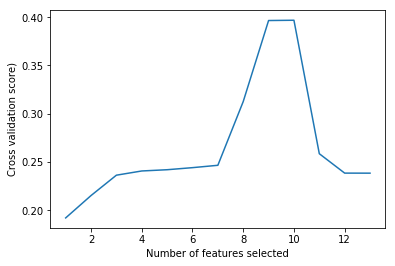

In [86]:
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svr = SVR(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svr, step=1, cv=StratifiedKFold(6),
              scoring='r2')
rfecv.fit(X, Y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [87]:
## Creating with all 17 columns
# X_test = df_test[relevant_columns]
print(X.shape)

(1460, 13)


In [88]:
from sklearn import preprocessing
# standardized_X = preprocessing.scale(X)
X = rfecv.transform(X)
# X_test = rfecv.transform(X_test)

In [99]:
df_test = rfecv.transform(df_test)

ValueError: X has a different shape than during fitting.

In [89]:
## Validate the model using Cross validation split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20 ,random_state=42)

In [93]:
### Always deployt basic Linear regression on a problem first
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train,y_train )
print(reg.score(X_train, y_train))

print(reg.coef_)

print(reg.intercept_)

y_pred = reg.predict(X_test)

0.7805142455949068
[ 1.48527244e+04  2.44258500e+02  1.39962104e+02 -9.09425217e+03
 -4.42031897e+03  1.15983300e+01  4.47541723e+01 -1.16087883e+04
  1.30140183e+04  1.55599214e+04]
-712876.2558569063


In [95]:
from sklearn import metrics

print(metrics.mean_squared_error(y_test,y_pred))

1556811846.4864662


MSE: 6863450986.3495


Text(0, 0.5, 'Deviance')

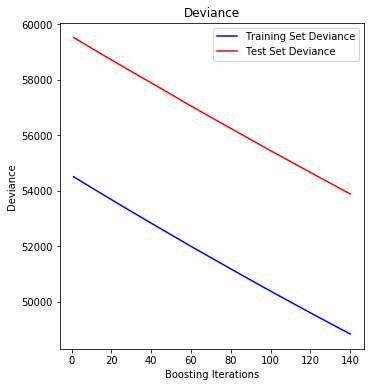

In [96]:
from sklearn import ensemble
params = {'n_estimators': 140, 'max_depth': 8, 'min_samples_split': 10,
          'learning_rate': 0.001, 'loss': 'lad'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')


In [46]:
y_pred = clf.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))

In [48]:
rms

75314.8316241697

In [381]:
import datetime
now = datetime.datetime.now()

var = str(now.year) + str("-") + str(now.month)

In [388]:
basedir = "C://ProgramData"
supplier = "New"

In [389]:
import os

In [390]:
os.path.join(basedir, var, supplier)

'C://ProgramData\\2019-6\\New'

In [392]:
now.date

<function datetime.date>